# DT on the clean Data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import graphviz
import pydotplus
import os

In [3]:
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Statistical analysis

In [24]:
df = pd.read_csv('K_clean_data.csv')
df_singles = df[df['Current_status'] > 0]
df_singles

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,1
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,1
9,0,2,1,1,2,0,2,3,4,3,...,0,1,0,1,0,1,1,1,0,1
12,0,2,1,1,1,0,3,4,3,3,...,0,1,1,0,1,0,0,1,1,1
14,0,1,1,1,2,2,3,5,5,2,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,2,0,2,2,2,0,4,4,5,...,0,2,1,1,0,0,0,1,0,1
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,1
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,1
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,1


In [5]:
df.columns

Index(['Location', 'Age', 'Gender', 'Interested_in', 'Current_status',
       'Usually', 'Confidence', 'Bars', 'Social_network', 'Dating apps',
       'Through_a_friend', 'Street', 'experience', 'frequently_use', 'paid',
       'swipes_are', 'look_for_Short_term', 'look_for_Long_term', 'Tinder',
       'Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo', 'num_apps',
       'use_for_Long_term', 'use_for_Short_term', 'use_for_Friends',
       'affraid_bad_people', 'not_seen_there', 'too_much_not_myType',
       'cannot_find_somebody_I_like', 'Kukumbo?'],
      dtype='object')

In [6]:
cor_mat_df = df[['Age','Gender','Interested_in','Current_status','Usually','Confidence',
                 'Bars','Social_network','Dating apps','Through_a_friend','Street',
                 'experience','frequently_use','paid','swipes_are','look_for_Short_term','look_for_Long_term',
                 'Tinder','Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo','num_apps',
                 'use_for_Long_term','use_for_Short_term','use_for_Friends',
                 'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like','Kukumbo?']]
corr_matrix = cor_mat_df.corr(method='pearson')

In [23]:
#save to pdf
corr_matrix.to_csv('corrolation_matrix.csv')   

In [67]:
rows = 'Gender'
df_singles[[rows,'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like']].groupby(rows, as_index=False).mean().sort_values(by=rows, ascending=True)

,Gender,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like
0,0,0.341667,0.400000,0.416667,0.316667
1,1,0.148148,0.266667,0.459259,0.481481


## Desicion Tree

### Preperations

In [72]:
X = df.drop('Kukumbo?',axis=1)
y = pd.DataFrame(df['Kukumbo?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
X_singles = df_singles.drop('Kukumbo?',axis=1)
y_singles = pd.DataFrame(df_singles['Kukumbo?'])
X_train_singles, X_test_singles, y_train_singles, y_test_singles = train_test_split(
    X_singles, y_singles, test_size=0.3, random_state=1)

In [74]:
y_train = y_train.replace([0,1], ['No', 'Yes'])
y_test = y_test.replace([0,1], ['No', 'Yes'])
y_train_singles = y_train_singles.replace([0,1], ['No', 'Yes'])
y_test_singles = y_test_singles.replace([0,1], ['No', 'Yes'])

In [75]:
train = pd.concat([X_train,y_train],axis=1)
train_singles = pd.concat([X_train_singles,y_train_singles],axis=1)
classes = np.unique(y_train)

In [76]:
def plot_accuracy(train_acc, test_acc):  
    ds = list(range(1, len(train_acc)+1))
    plt.scatter(ds,train_acc, s=10,label='Train')
    plt.scatter(ds,test_acc, s=10,label='Test')
    plt.xlabel('Max-depth',fontsize=15)
    plt.ylabel('Accuracy',fontsize=15)
    plt.title('Accuracy as a function of max-depth on train & test data',fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(axis='y')
    plt.show()

In [126]:
def build_tree(X_train, X_test=None, y_train=y_train, y_test=y_test, max_d=5,dir_name=None, to_pdf=True, to_plot=False):
    train_acc = list()
    test_acc = list()
    ds = range(1,max_d)
    best_acc_test = -1
    
    if to_pdf:
        make_dir(dir_name)

    for d in ds:
        clf = DecisionTreeClassifier(max_depth=d)
        clf.fit(X_train,y_train)
        y_pred_train = clf.predict(X_train)
        
        if to_pdf:
            # create a graph
            dot_data = tree.export_graphviz(clf, out_file=None, 
                                           feature_names=list(X_train.columns),
                                           class_names=list(classes),
                                           filled=True)
            graph = pydotplus.graph_from_dot_data(dot_data)
        
            #save to pdf
            graph.write_pdf(f'{dir_name}_tree_{d}.pdf')
        
        if to_plot:
            y_pred_test = clf.predict(X_test)
            
            train_acc.append(accuracy_score(y_train, y_pred_train))
            cur_acc_test = accuracy_score(y_test, y_pred_test)
            test_acc.append(cur_acc_test)
        if cur_acc_test > best_acc_test:
            y_pred_test_best = y_pred_test
            best_acc_test = cur_acc_test
            
    if to_plot:
        plot_accuracy(train_acc, test_acc)
        return y_pred_test_best

In [87]:
def make_dir(dir_name):
    # Parent Directory path
    parent_dir = os.path.dirname(os.path.realpath('DT.ipnb'))
  
    # Path
    path = os.path.join(parent_dir, dir_name)
  
    # Create the directory
    os.mkdir(path)

In [122]:
def print_matrix(pred, true):
    tn, fp, fn, tp = confusion_matrix(y_pred=pred, y_true=true) .ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    presicion = tp / (tp + fp)
    print(f'Accuracy: {accuracy * 100:.2f}%\n'
          f'Sensitivity: {sensitivity * 100:.2f}%\n'
          f'Specificity: {specificity * 100:.2f}%\n'
          f'Presicion: {presicion * 100:.2f}%'
         )

### Prediction

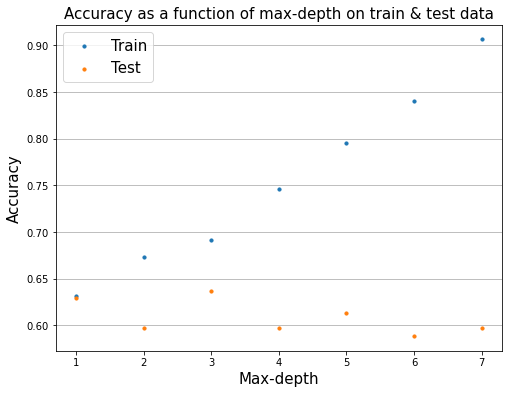

Accuracy: 63.71%
Sensitivity: 78.21%
Specificity: 39.13%
Presicion: 68.54%


In [131]:
# Train a DT on the data
y_pred_test = build_tree(X_train=X_train, X_test=X_test, max_d=8, to_pdf=False, to_plot=True)
print_matrix(y_pred_test, y_test) 

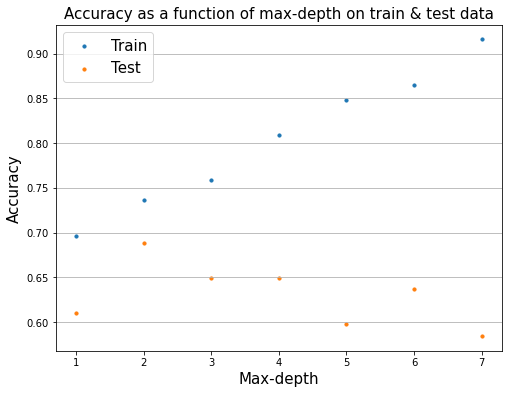

Accuracy: 68.83%
Sensitivity: 79.63%
Specificity: 43.48%
Presicion: 76.79%


In [128]:
# Train a DT on the data of the singles only
y_pred_test = build_tree(X_train=X_train_singles, y_train=y_train_singles, X_test=X_test_singles, y_test=y_test_singles,
           max_d=8, to_pdf=False, to_plot=True)
print_matrix(y_pred_test, y_test_singles) 

In [17]:
# Train a Random Forest on the data
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

62.9

# Title

first we try to predict, we discovered bad results on the data. Then we saved to trees and analyze them. 
W saw that there is a bias on the main feature (- the root) since when we asked on experience all of those who have relationship or not used today apps do not have experience havs value 0. 

Then we decide to drop this column

Second, since our main goal is not to predict and only to  find strong feature and information about what happen in the market we split to 2 cases:
- build tree of all the data 
- bulid tree by 70% train and 30% test

In [18]:
# work with train and test 
X_train_noExp = X_train.drop(columns=['experience'])
X_test_noExp = X_test.drop(columns=['experience'])

# work on all data 
X_all_noExp = X.drop(columns=['experience'])

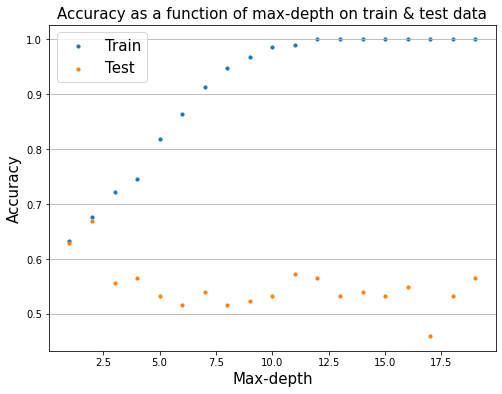

In [19]:
build_tree(X_train= X_train_noExp, X_test= X_test_noExp, max_d=20, dir_name= 'train_test_no_Exp', to_pdf=False, to_plot=True)

In [81]:
build_tree( X_train= X_all_noExp, y_train = y, max_d=5, dir_name = 'all_data_noExp', to_pdf=True, to_plot=False)

NameError: name 'X_all_noExp' is not defined

# Title 2

we still have the same problem so think to try to drop all those who have a realationship 

In [82]:
build_tree(X_train=X_singles, y_train = y_singles, max_d=5, dir_name = 'all_data_no_Location', to_pdf=False, to_plot=False)

In [91]:
X_cur = X_singles.drop(columns=['Location','experience','Current_status','Usually',
                           'Tinder','Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo'])
build_tree(X_train=X_cur, y_train=y_singles, max_d=5, dir_name = 'singles_1', to_pdf=True, to_plot=False)

C:\Users\Owner\Desktop\studies\20-21\B\מדע נתונים יישומי\Project
